# Tutorial 2 - linear regression

The data used in this example was published by the Oak Ridge National Laboratory, Building Technologies Research and Integration Center (USA). It contains end use breakdowns of energy use and various indoor environmental conditions collected at the Campbell Creek Research House #3, at a 15 minute time stamp. The data availability ranges from 10/1/2013 to 9/30/2014.

The main data file `ornlbtricdatafromcc3fy2014.xlsx` comes with a separate file `ornlbtriccchousedatalegend.xlsx` showing information on each column.

Now that we know how to load and visualise data, we can start modelling to find relationships between variables.

Start by running this block to load the data and save it in a daily average set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Importing data into a dataframe with the pandas library
df = pd.read_excel('data/ornlbtricdatafromcc3fy2014.xlsx', header=1, skiprows=[2, 3], na_values='NAN')
df.set_index(pd.to_datetime(df['TIMESTAMP']), inplace=True)

temperatures = ["RoofS_tmp_Avg","AtticFlrS_tmp_Avg","RoofN_tmp_Avg","AtticFlrN_tmp_Avg","BonusFlr_tmp_Avg",
                "CantFlr_tmp_Avg","WallNcav_tmp_Avg","WallNsrf_tmp_Avg","WallScav_tmp_Avg",
                "WallSsrf_tmp_Avg","FanTsup_tmp_Avg","FanTret_tmp_Avg","FanTexh_tmp_Avg","FanTint_tmp_Avg",
                "Din_tmp_Avg","Grt_tmp_Avg","Brkf_tmp_Avg","Kit_tmp_Avg","BedM_tmp_Avg","Bed3_tmp_Avg",
                "Bed2_tmp_Avg","BedB_tmp_Avg","Mbath_tmp_Avg","Outside_Tmp_Avg"]
for t in temperatures:
    df[t] = (df[t]-32) * 5/9
    
rooms = ['Din_tmp_Avg', 'Grt_tmp_Avg', 'Brkf_tmp_Avg', 'Kit_tmp_Avg', 'BedM_tmp_Avg', 'Bed3_tmp_Avg', 'Bed3_tmp_Avg', 'Bed2_tmp_Avg', 'BedB_tmp_Avg', 'Mbath_tmp_Avg']

df['ti'] = df[rooms].mean(axis=1)

df_day = df.groupby(df.index.date).mean()

## Linear regression

The goal of linear regression analysis is to determine a linear relationship between a dependent variable $y$ and one or more independent variables $x$.

$$y = a_0 + a_1 x_1 + ... + a_p x_p + \varepsilon$$

<img src='images/linear_regression_1.png' width=200 />

In this first example, we look for the relationship between the power generated by the PV panels and the daily averaged solar irradiance.

                                 OLS Regression Results                                
Dep. Variable:       PV_generated_Tot   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              7990.
Date:                Sat, 04 Mar 2023   Prob (F-statistic):                   3.14e-250
Time:                        10:06:28   Log-Likelihood:                         -1664.8
No. Observations:                 366   AIC:                                      3332.
Df Residuals:                     365   BIC:                                      3336.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

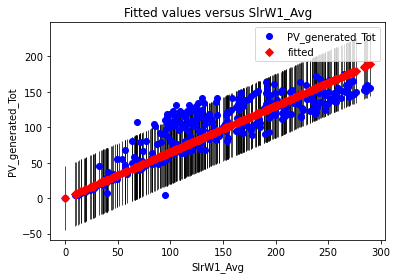

In [2]:
# Definition of the output data y1 and the input data x1
y1 = df_day['PV_generated_Tot']
x1 = df_day['SlrW1_Avg']
#x1 = np.column_stack((data_['T_in'] - data_['T_ext'], np.ones(len(data_))))

# Fitting the linear regressor and showing results
res_LR1 = sm.OLS(y1, x1).fit()
print(res_LR1.summary())

# I added a plot of the results
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(res_LR1, 0, ax=ax)
plt.show()

Linear regression with two or more input variables is possible, and done the same way as with one.

<img src='images/linear_regression_2.png' width=200 />

                                 OLS Regression Results                                
Dep. Variable:       PV_generated_Tot   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              4913.
Date:                Sat, 04 Mar 2023   Prob (F-statistic):                   4.35e-264
Time:                        10:13:13   Log-Likelihood:                         -1628.0
No. Observations:                 366   AIC:                                      3260.
Df Residuals:                     364   BIC:                                      3268.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

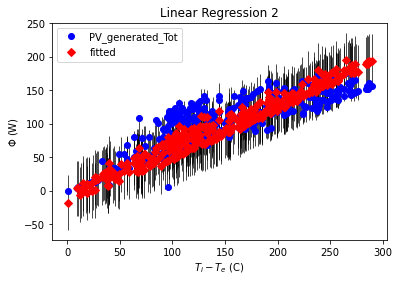

In [3]:
# Definition of the output data y2 and the two inputs in x2
y2 = df_day['PV_generated_Tot']
x2 = df_day[['SlrW1_Avg', 'Outside_Tmp_Avg']]
# Model fitting
res_LR2 = sm.OLS(y2, x2).fit()
print(res_LR2.summary())

fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(res_LR2, 0, ax=ax)
plt.show()

However it is possible to include variables which have no influence on the output variable.

                                 OLS Regression Results                                
Dep. Variable:       PV_generated_Tot   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              4768.
Date:                Sat, 04 Mar 2023   Prob (F-statistic):                   4.07e-291
Time:                        10:16:44   Log-Likelihood:                         -1560.9
No. Observations:                 366   AIC:                                      3128.
Df Residuals:                     363   BIC:                                      3139.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

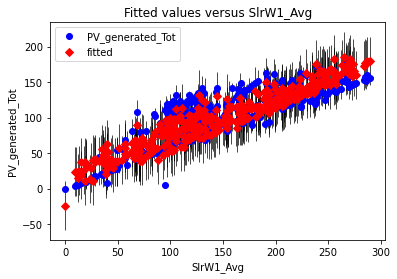

In [9]:
# Definition of the output data y2 and the two inputs in x2
y3 = df_day['PV_generated_Tot']
x3 = df_day[['SlrW1_Avg', 'Outside_Tmp_Avg', 'fridge_Tot']]
# Model fitting
res_LR3 = sm.OLS(y3, x3).fit()
print(res_LR3.summary())

fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(res_LR3, 0, ax=ax)
plt.show()